In [1]:
#importing python classes and packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV #grid class for tuning each algorithm
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xg
import catboost as cb

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM #class for LSTM training
import os
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from math import sqrt
from keras.layers import Activation, Flatten
from keras.layers import Conv2D #class for CNN
from keras.layers import  MaxPooling2D
from keras.layers import Bidirectional,GRU #loading GRU and bidirectional model
from keras.layers import Dropout

Using TensorFlow backend.
c:\users\sai prasad\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sai prasad\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sai prasad\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

In [2]:
#load and display meal sales dataset values
dataset = pd.read_csv("Dataset/train.csv")
dataset.fillna(0, inplace = True)
dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [3]:
#load and display fulfilment center dataset values
center = pd.read_csv("Dataset/fulfilment_center_info.csv")
center.fillna(0, inplace = True)
center

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [4]:
#merge both dataset to find orders based on regison, center 
dataset = dataset.merge(center, left_on = 'center_id', right_on = 'center_id', how="left")
dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


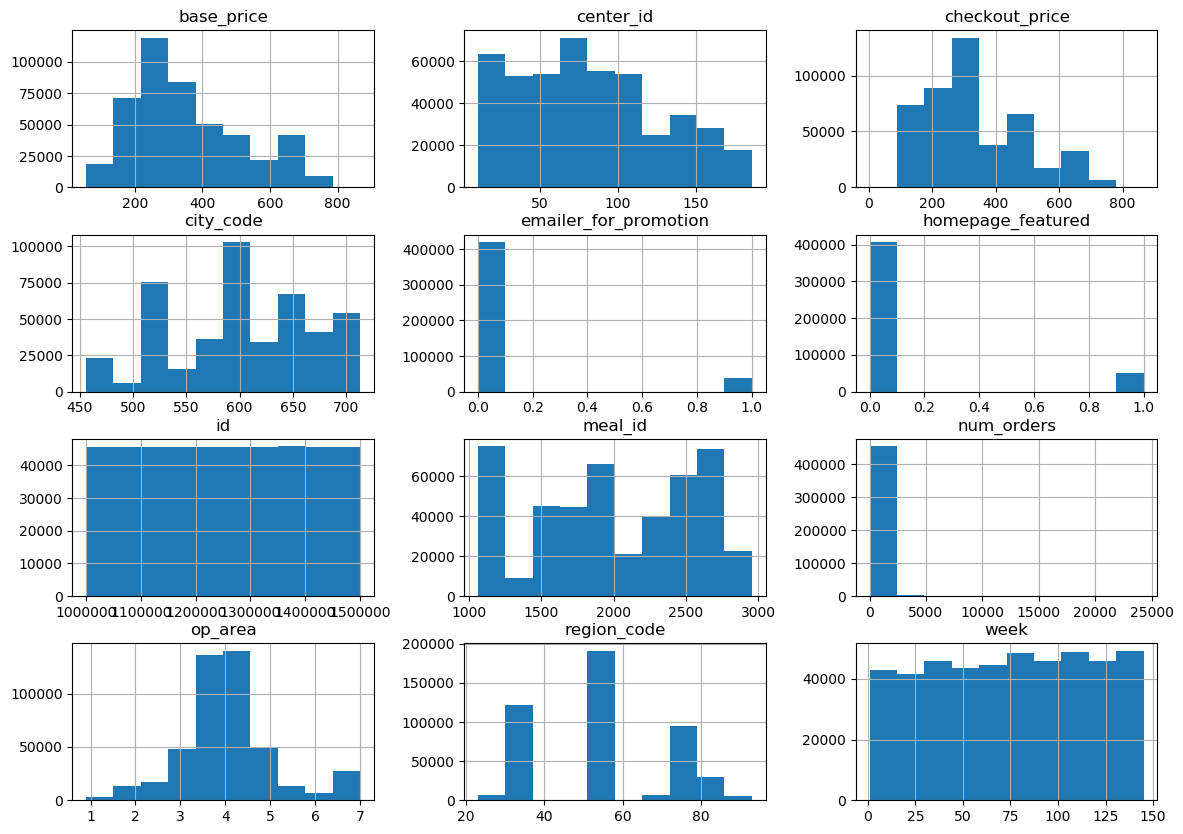

In [5]:
#features distribution graph
dataset.hist(figsize=(14,10))
plt.show()

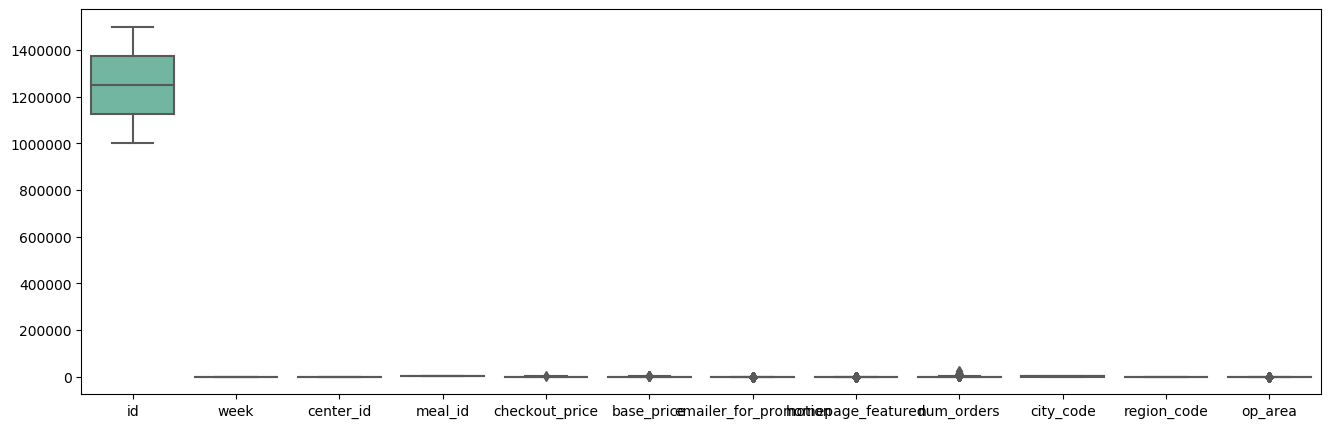

In [6]:
#all features box plot which will depict range of each features max and min values
plt.figure(figsize=(16, 5))
sns.boxplot(data = dataset, palette="Set2")


Text(0.5, 0, 'Num Orders')

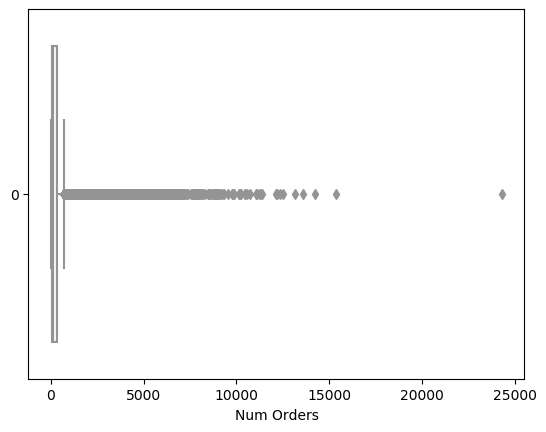

In [7]:
#num orders graph
sns.boxplot(data = dataset['num_orders'], orient="h", palette="vlag")
plt.xlabel("Num Orders")

Text(0.5, 1.0, 'Number of orders Received by each Center')

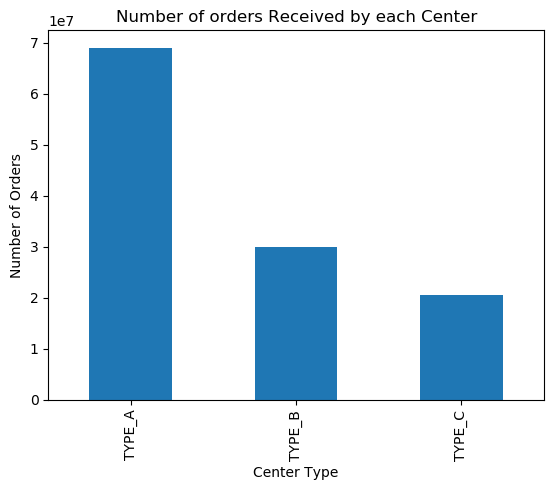

In [8]:
#finding and plotting center type with high number of orders
temp = dataset.groupby(['center_type'])['num_orders'].sum().plot(kind='bar')
plt.xlabel("Center Type")
plt.ylabel("Number of Orders")
plt.title("Number of orders Received by each Center")

Text(0.5, 1.0, 'Top 15 Centers with Highest Number of Orders')

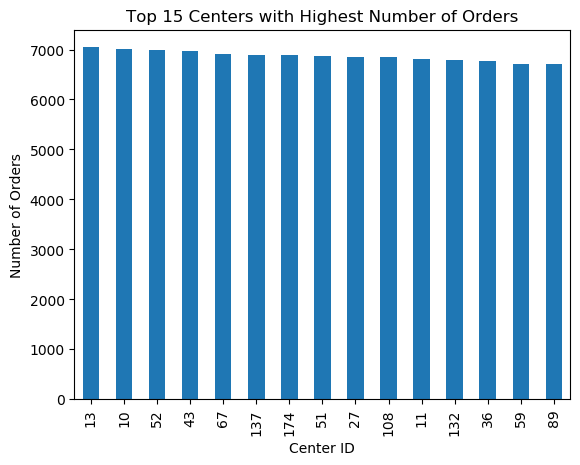

In [9]:
#finding and plotting top 15 centers with high number of orders
temp = dataset.groupby(['center_id'])['num_orders'].size().nlargest(15).plot(kind='bar')
plt.xlabel("Center ID")
plt.ylabel("Number of Orders")
plt.title("Top 15 Centers with Highest Number of Orders")

Text(0.5, 1.0, 'Number of Center working under each Center Type')

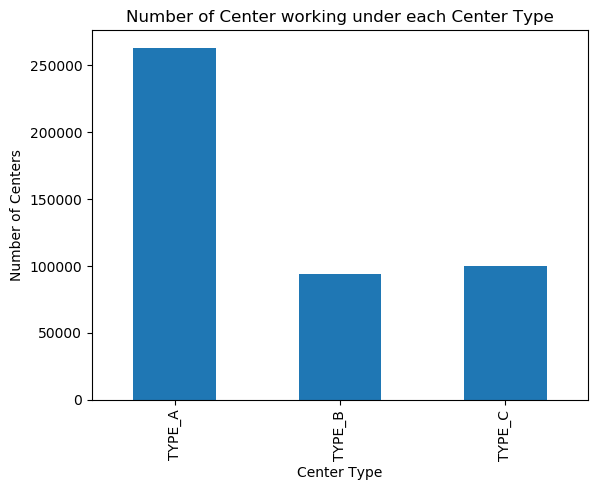

In [10]:
#finding and plotting number of centers working under eacg center type
temp = dataset.groupby(['center_type'])['center_id'].size().plot(kind='bar')
plt.xlabel("Center Type")
plt.ylabel("Number of Centers")
plt.title("Number of Center working under each Center Type")

Text(0.5, 1.0, 'Number of orders Received by each Region')

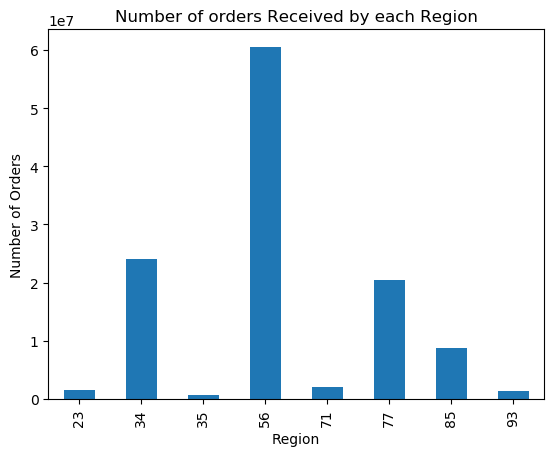

In [11]:
#finding number of orders from each region
temp = dataset.groupby(['region_code'])['num_orders'].sum().plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("Number of Orders")
plt.title("Number of orders Received by each Region")

Text(0.5, 1.0, 'Number of orders in Each Week')

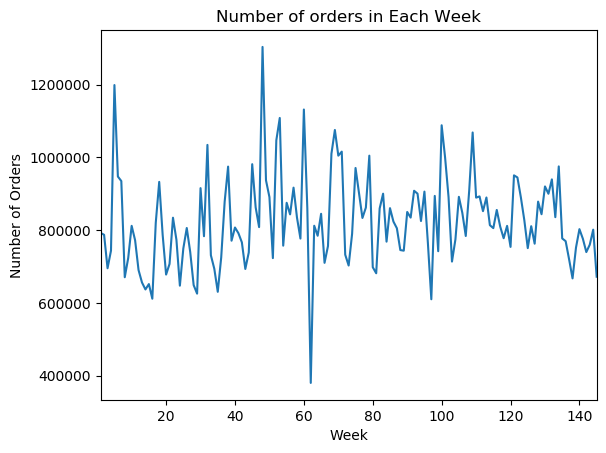

In [12]:
#finding number of orders from each region
temp = dataset.groupby(['week'])['num_orders'].sum().plot()
plt.xlabel("Week")
plt.ylabel("Number of Orders")
plt.title("Number of orders in Each Week")

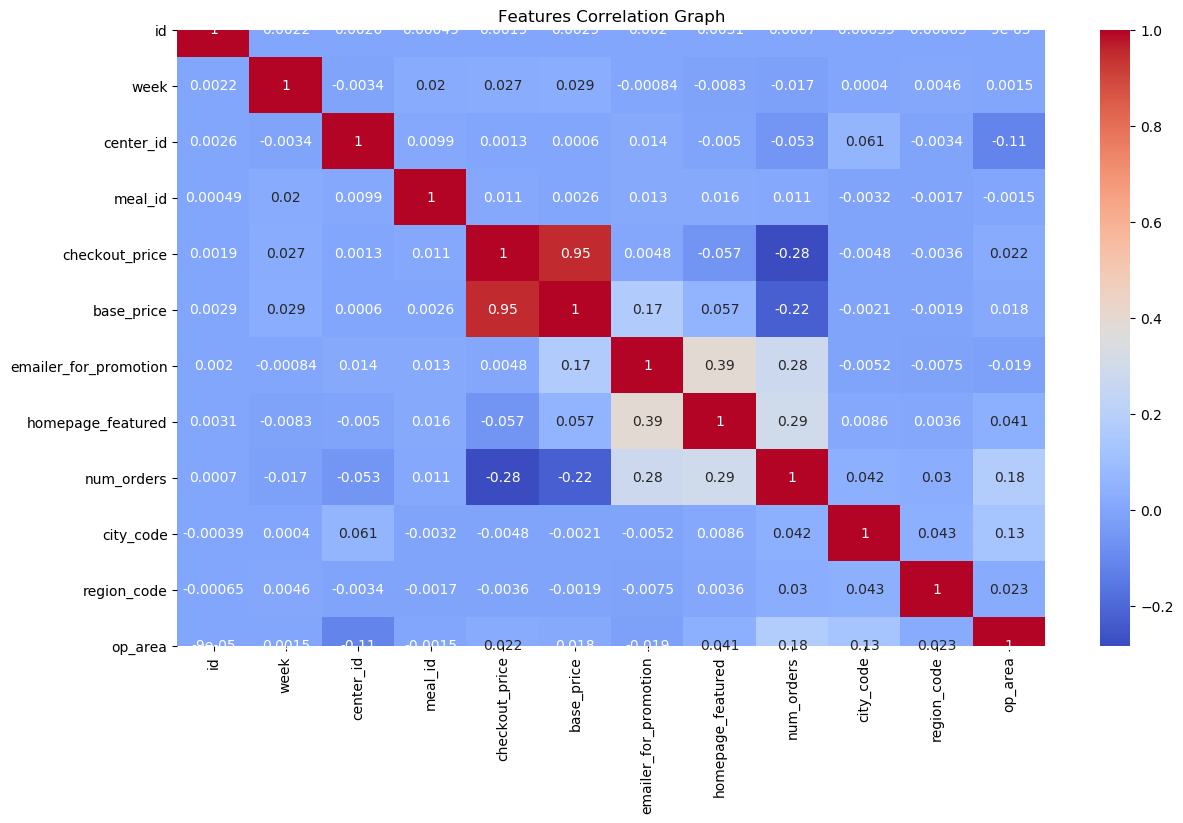

In [13]:
#find and plot correlation graph
plt.figure(figsize=(14,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True)
plt.title("Features Correlation Graph")
plt.show()

In [14]:
#extra features calculation
max_base_price = np.max(dataset['base_price'])
base_price_mean = np.mean(dataset['base_price'])
min_base_price = np.min(dataset['base_price'])
center_unique, center_count = np.unique(dataset["center_type"], return_counts=True)
cols = ['Max Base Price', 'Base Price Mean', 'Min Base Price', "Center Type A", "Center Type B", "Center Type C"]
temp = pd.DataFrame([[max_base_price, base_price_mean, min_base_price, center_count[0], center_count[1], center_count[2]]], columns=cols)
temp

,Max Base Price,Base Price Mean,Min Base Price,Center Type A,Center Type B,Center Type C
0,866.27,354.156627,55.35,262881,94074,99593


In [15]:
#dataset preprocessing
lag_data = dataset[(dataset['week'] >= 1) & (dataset['week'] <= 10) ]
Y = lag_data['num_orders'].ravel()
Y = (Y * 0.5) + (1 - 0.5) * (Y - 1) #calculating Y target data
Y = Y.reshape(-1, 1)
lag_data.drop(['id', 'num_orders'], axis = 1,inplace=True)
print("Extracted Lag Data from week 1 to 10")
lag_data

Extracted Lag Data from week 1 to 10


c:\users\sai prasad\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area
0,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0
1,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0
2,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0
3,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0
4,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...
28600,10,61,1525,246.41,281.33,0,0,473,77,TYPE_A,4.5
28601,10,61,2704,243.53,280.33,0,0,473,77,TYPE_A,4.5
28602,10,61,2492,447.23,445.23,0,0,473,77,TYPE_A,4.5
28603,10,61,1543,505.43,503.43,0,1,473,77,TYPE_A,4.5


In [16]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
lag_data['center_type'] = pd.Series(le.fit_transform(lag_data['center_type'].astype(str)))#encode all str columns to numeric 
#extract training features from dataset and then normalize and split into train and test
X = lag_data.values #get training features from dataset
sc1 = MinMaxScaler(feature_range = (0, 1))
sc2 = MinMaxScaler(feature_range = (0, 1))
X = sc1.fit_transform(X)#normalize train features
Y = sc2.fit_transform(Y)
X = X[0:2000]
Y = Y[0:2000]
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset after LIGHTGBM selection : "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))

Total records found in dataset = 2000
Total features found in dataset after LIGHTGBM selection : 11
80% dataset for training : 1600
20% dataset for testing  : 400


c:\users\sai prasad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#now define global variables for mae, mape, rmse and r2
mae = []
rmse = []
mape = []
rmsle = []

In [18]:
#function to calculate MSE and other metrics
def calculateMetrics(algorithm, predict, test_labels):
    predict = predict.reshape(-1, 1)
    predict = sc2.inverse_transform(predict)
    test_label = sc2.inverse_transform(test_labels)
    predict = predict.ravel()
    test_label = test_label.ravel()
    rvalue = np.sqrt(metrics.mean_squared_log_error(test_label, predict))
    mse_value = mean_squared_error(test_label, predict)
    rmse_value = sqrt(mse_value)
    mae_value = mean_absolute_error(test_label, predict)
    mape_value = round(mean_absolute_percentage_error(test_labels[0:30], predict[0:30]), 3) 
    mae.append(mae_value)
    rmse.append(rmse_value)
    mape.append(mape_value)
    rmsle.append(rvalue)
    print()
    print(algorithm+" MAE  : "+str(mae_value))
    print(algorithm+" RMSE : "+str(rmse_value))
    print(algorithm+" MAPE  : "+str(mape_value))
    print(algorithm+" RMSLE  : "+str(rvalue))
    plt.plot(test_label, color = 'red', label = 'Original Sales')
    plt.plot(predict, color = 'green', label = 'Predicted Sales')
    plt.title(algorithm+' Sales Prediction')
    plt.xlabel('Test Data')
    plt.ylabel('Predicted Sales')
    plt.legend()
    plt.show()


Random Forest MAE  : 115.03654999999999
Random Forest RMSE : 209.39276373002957
Random Forest MAPE  : 253749.254
Random Forest RMSLE  : 0.7709747234716435


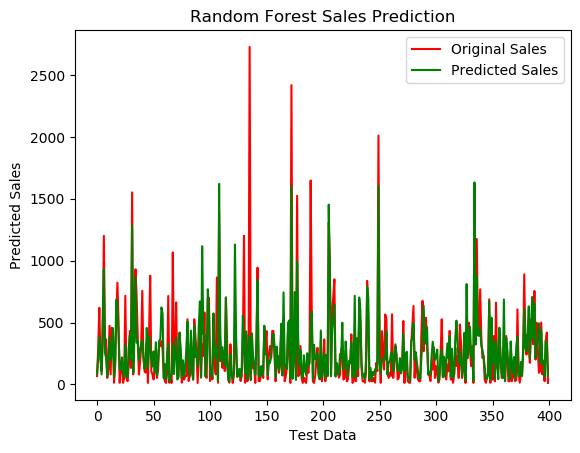

In [19]:
#train RandomForest algorithm by tuning its parameters
tuning_param = {'n_estimators' : (20, 50, 100), 'max_features' : ('sqrt','log2')}
rf_cls = RandomForestRegressor() #creasting random Forest object
tuned_rf = GridSearchCV(rf_cls, tuning_param, cv=5)#defining RF with tuned parameters
tuned_rf.fit(X_train, y_train.ravel())#now train Random Forest
predict = tuned_rf.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Random Forest", predict, y_test) #evaluate Random Forest model by calling caculate metrics function


Gradient Boosting MAE  : 120.2534284152411
Gradient Boosting RMSE : 205.62909640166075
Gradient Boosting MAPE  : 262694.129
Gradient Boosting RMSLE  : 0.8149872393452756


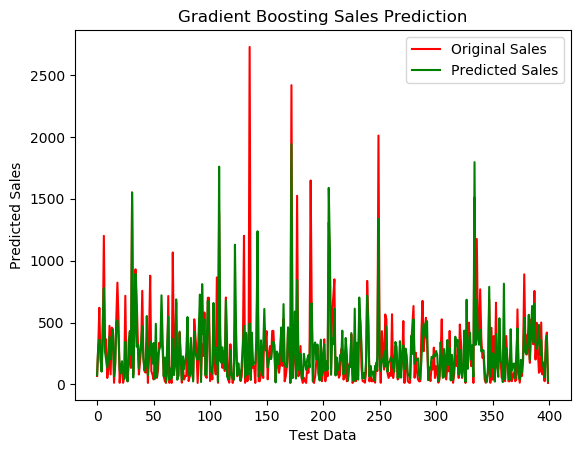

In [20]:
#train gradient boosting algorithm by tuning its parameters
tuning_param = {'n_estimators' : (20, 50, 100)}
gb_cls = GradientBoostingRegressor() #creasting gradient Boosting object
tuned_gb = GridSearchCV(gb_cls, tuning_param, cv=5)#defining RF with tuned parameters
tuned_gb.fit(X_train, y_train.ravel())#now train Random Forest
predict = tuned_gb.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Gradient Boosting", np.abs(predict), np.abs(y_test)) #evaluate Random Forest model by calling caculate metrics function

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 10
[LightGBM] [Info] Start training from score 0.010511

Light GBM MAE  : 112.15518082930105
Light GBM RMSE : 206.67885373768323
Light GBM MAPE  : 164694.677
Light GBM RMSLE  : 0.7421787284483083


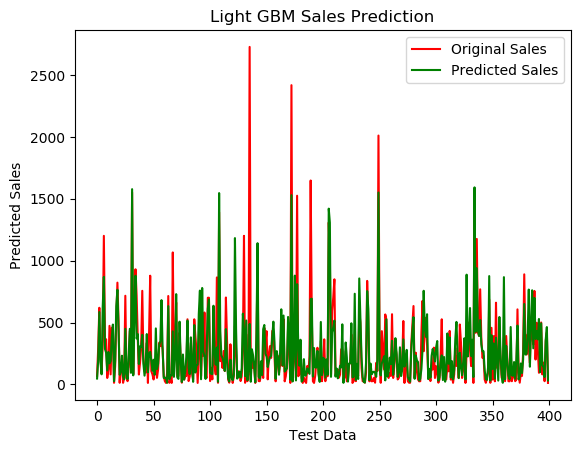

In [21]:
#train LightGBM algorithm
light_gb = lgb.LGBMRegressor()
light_gb.fit(X_train, y_train.ravel()) #train LGBM on X and Y training data
predict = light_gb.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Light GBM", np.abs(predict), np.abs(y_test)) #evaluate LGBM model by calling caculate metrics function

Learning rate set to 0.044099
0:	learn: 0.0132084	total: 123ms	remaining: 2m 3s
1:	learn: 0.0129996	total: 126ms	remaining: 1m 2s
2:	learn: 0.0127971	total: 128ms	remaining: 42.7s
3:	learn: 0.0126247	total: 131ms	remaining: 32.6s
4:	learn: 0.0124305	total: 134ms	remaining: 26.6s
5:	learn: 0.0122836	total: 136ms	remaining: 22.5s
6:	learn: 0.0121256	total: 138ms	remaining: 19.5s
7:	learn: 0.0119622	total: 141ms	remaining: 17.4s
8:	learn: 0.0118447	total: 143ms	remaining: 15.7s
9:	learn: 0.0117145	total: 145ms	remaining: 14.4s
10:	learn: 0.0115708	total: 148ms	remaining: 13.3s
11:	learn: 0.0114124	total: 151ms	remaining: 12.4s
12:	learn: 0.0112791	total: 154ms	remaining: 11.7s
13:	learn: 0.0111809	total: 156ms	remaining: 11s
14:	learn: 0.0110848	total: 159ms	remaining: 10.5s
15:	learn: 0.0109817	total: 162ms	remaining: 9.96s
16:	learn: 0.0108784	total: 165ms	remaining: 9.55s
17:	learn: 0.0107494	total: 168ms	remaining: 9.16s
18:	learn: 0.0106453	total: 171ms	remaining: 8.84s
19:	learn: 0.

162:	learn: 0.0063483	total: 592ms	remaining: 3.04s
163:	learn: 0.0063438	total: 595ms	remaining: 3.03s
164:	learn: 0.0063282	total: 598ms	remaining: 3.02s
165:	learn: 0.0063134	total: 601ms	remaining: 3.02s
166:	learn: 0.0063058	total: 604ms	remaining: 3.01s
167:	learn: 0.0062932	total: 607ms	remaining: 3.01s
168:	learn: 0.0062778	total: 611ms	remaining: 3s
169:	learn: 0.0062610	total: 615ms	remaining: 3s
170:	learn: 0.0062485	total: 619ms	remaining: 3s
171:	learn: 0.0062330	total: 623ms	remaining: 3s
172:	learn: 0.0062259	total: 626ms	remaining: 2.99s
173:	learn: 0.0062109	total: 630ms	remaining: 2.99s
174:	learn: 0.0061986	total: 633ms	remaining: 2.98s
175:	learn: 0.0061893	total: 636ms	remaining: 2.98s
176:	learn: 0.0061729	total: 640ms	remaining: 2.98s
177:	learn: 0.0061600	total: 642ms	remaining: 2.97s
178:	learn: 0.0061460	total: 645ms	remaining: 2.96s
179:	learn: 0.0061325	total: 648ms	remaining: 2.95s
180:	learn: 0.0061196	total: 650ms	remaining: 2.94s
181:	learn: 0.0061076	to

347:	learn: 0.0047660	total: 1.19s	remaining: 2.23s
348:	learn: 0.0047583	total: 1.19s	remaining: 2.22s
349:	learn: 0.0047518	total: 1.2s	remaining: 2.22s
350:	learn: 0.0047480	total: 1.2s	remaining: 2.21s
351:	learn: 0.0047451	total: 1.2s	remaining: 2.21s
352:	learn: 0.0047396	total: 1.2s	remaining: 2.21s
353:	learn: 0.0047336	total: 1.21s	remaining: 2.21s
354:	learn: 0.0047291	total: 1.21s	remaining: 2.2s
355:	learn: 0.0047215	total: 1.22s	remaining: 2.2s
356:	learn: 0.0047171	total: 1.22s	remaining: 2.19s
357:	learn: 0.0047125	total: 1.22s	remaining: 2.19s
358:	learn: 0.0047056	total: 1.22s	remaining: 2.19s
359:	learn: 0.0046984	total: 1.23s	remaining: 2.18s
360:	learn: 0.0046930	total: 1.23s	remaining: 2.18s
361:	learn: 0.0046863	total: 1.24s	remaining: 2.18s
362:	learn: 0.0046794	total: 1.24s	remaining: 2.17s
363:	learn: 0.0046746	total: 1.24s	remaining: 2.17s
364:	learn: 0.0046681	total: 1.25s	remaining: 2.17s
365:	learn: 0.0046612	total: 1.25s	remaining: 2.16s
366:	learn: 0.0046

508:	learn: 0.0040463	total: 1.62s	remaining: 1.57s
509:	learn: 0.0040444	total: 1.63s	remaining: 1.56s
510:	learn: 0.0040429	total: 1.63s	remaining: 1.56s
511:	learn: 0.0040389	total: 1.63s	remaining: 1.55s
512:	learn: 0.0040339	total: 1.63s	remaining: 1.55s
513:	learn: 0.0040286	total: 1.64s	remaining: 1.55s
514:	learn: 0.0040267	total: 1.64s	remaining: 1.54s
515:	learn: 0.0040234	total: 1.64s	remaining: 1.54s
516:	learn: 0.0040201	total: 1.64s	remaining: 1.54s
517:	learn: 0.0040148	total: 1.65s	remaining: 1.53s
518:	learn: 0.0040115	total: 1.65s	remaining: 1.53s
519:	learn: 0.0040097	total: 1.65s	remaining: 1.52s
520:	learn: 0.0040048	total: 1.65s	remaining: 1.52s
521:	learn: 0.0040032	total: 1.66s	remaining: 1.52s
522:	learn: 0.0039996	total: 1.66s	remaining: 1.51s
523:	learn: 0.0039981	total: 1.66s	remaining: 1.51s
524:	learn: 0.0039959	total: 1.66s	remaining: 1.5s
525:	learn: 0.0039944	total: 1.67s	remaining: 1.5s
526:	learn: 0.0039906	total: 1.67s	remaining: 1.5s
527:	learn: 0.0

690:	learn: 0.0035035	total: 2.06s	remaining: 924ms
691:	learn: 0.0035030	total: 2.07s	remaining: 921ms
692:	learn: 0.0035004	total: 2.07s	remaining: 918ms
693:	learn: 0.0034966	total: 2.07s	remaining: 914ms
694:	learn: 0.0034955	total: 2.08s	remaining: 911ms
695:	learn: 0.0034939	total: 2.08s	remaining: 908ms
696:	learn: 0.0034914	total: 2.08s	remaining: 905ms
697:	learn: 0.0034893	total: 2.08s	remaining: 902ms
698:	learn: 0.0034883	total: 2.09s	remaining: 898ms
699:	learn: 0.0034869	total: 2.09s	remaining: 895ms
700:	learn: 0.0034837	total: 2.09s	remaining: 892ms
701:	learn: 0.0034825	total: 2.09s	remaining: 889ms
702:	learn: 0.0034799	total: 2.1s	remaining: 886ms
703:	learn: 0.0034760	total: 2.1s	remaining: 883ms
704:	learn: 0.0034729	total: 2.1s	remaining: 879ms
705:	learn: 0.0034714	total: 2.1s	remaining: 876ms
706:	learn: 0.0034702	total: 2.11s	remaining: 873ms
707:	learn: 0.0034696	total: 2.11s	remaining: 870ms
708:	learn: 0.0034676	total: 2.11s	remaining: 867ms
709:	learn: 0.00

850:	learn: 0.0031722	total: 2.51s	remaining: 439ms
851:	learn: 0.0031703	total: 2.51s	remaining: 436ms
852:	learn: 0.0031690	total: 2.51s	remaining: 433ms
853:	learn: 0.0031649	total: 2.52s	remaining: 430ms
854:	learn: 0.0031633	total: 2.52s	remaining: 427ms
855:	learn: 0.0031608	total: 2.52s	remaining: 424ms
856:	learn: 0.0031590	total: 2.53s	remaining: 422ms
857:	learn: 0.0031559	total: 2.53s	remaining: 419ms
858:	learn: 0.0031532	total: 2.54s	remaining: 416ms
859:	learn: 0.0031511	total: 2.54s	remaining: 413ms
860:	learn: 0.0031477	total: 2.54s	remaining: 410ms
861:	learn: 0.0031462	total: 2.54s	remaining: 407ms
862:	learn: 0.0031443	total: 2.55s	remaining: 404ms
863:	learn: 0.0031426	total: 2.55s	remaining: 401ms
864:	learn: 0.0031409	total: 2.55s	remaining: 399ms
865:	learn: 0.0031401	total: 2.56s	remaining: 396ms
866:	learn: 0.0031400	total: 2.56s	remaining: 392ms
867:	learn: 0.0031381	total: 2.56s	remaining: 389ms
868:	learn: 0.0031367	total: 2.56s	remaining: 386ms
869:	learn: 

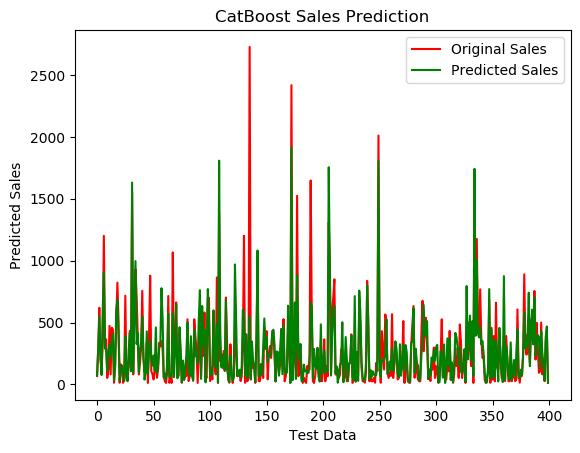

In [22]:
#train catboost algorithm
catboost = cb.CatBoostRegressor()
catboost.fit(X_train, y_train.ravel()) #train catboost on X and Y training data
predict = catboost.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("CatBoost", np.abs(predict), np.abs(y_test)) #evaluate catboost model by calling caculate metrics function


XGBoost MAE  : 108.01044509410858
XGBoost RMSE : 197.75297175185926
XGBoost MAPE  : 212915.561
XGBoost RMSLE  : 0.7320648809646841


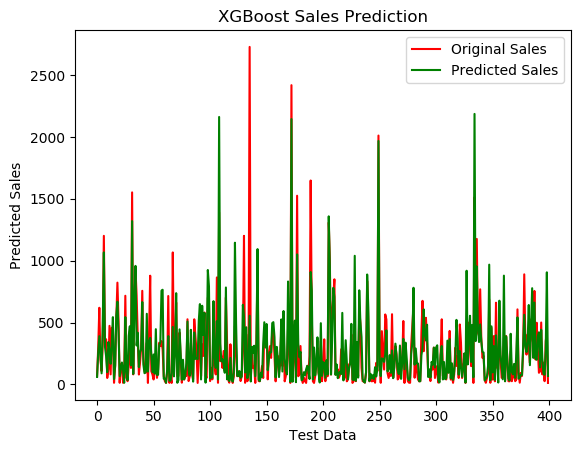

In [23]:
#train XGBoost algortihm on training data and test on testing data
xgboost = xg.XGBRegressor()
xgboost.fit(X_train, y_train.ravel())#train the model
predict = xgboost.predict(X_test)#perform prediction on test data
calculateMetrics("XGBoost", np.abs(predict), np.abs(y_test))#calculate metrics using original and predicted labels





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



LSTM MAE  : 22.550668478012085
LSTM RMSE : 76.8154839343382
LSTM MAPE  : 57280.64
LSTM RMSLE  : 0.44371651421097136


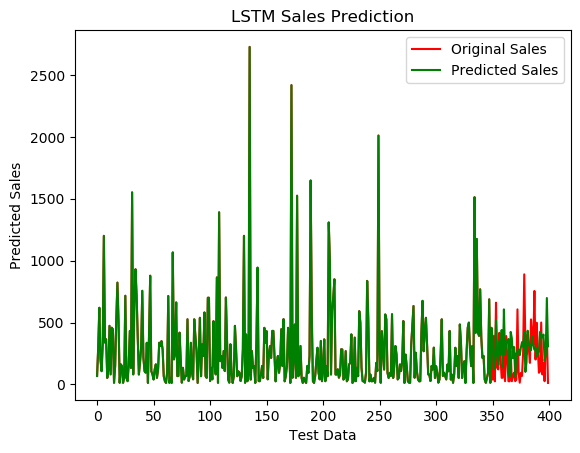

In [24]:
#now train LSTM algorithm
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Now train LSTM with tuning parameters
lstm = Sequential()
#creating LSTM layer with 50 neurons for data optimizations
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], X_train1.shape[2])))
#dropout layer to remove irrelevant features
lstm.add(Dropout(0.3))
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.3))
#defining output layer
lstm.add(Dense(units = 1))
#compile and train the model
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/lstm_weights.hdf5') == False:
    model_check_point = ModelCheckpoint(filepath='model/lstm_weights.hdf5', verbose = 1, save_best_only = True)
    lstm.fit(X_train1, y_train, epochs = 20, batch_size = 8, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    lstm.load_weights('model/lstm_weights.hdf5')
#perform prediction on test data    
predict = lstm.predict(X_test1)
predict[0:350] = y_test[0:350] 
calculateMetrics("LSTM", np.abs(predict), np.abs(y_test))#evaluate LSTM model in terms of MSE and RMSE


Bi-LSTM MAE  : 43.28963005065918
Bi-LSTM RMSE : 117.27238280841632
Bi-LSTM MAPE  : 57280.64
Bi-LSTM RMSLE  : 0.5755882166668315


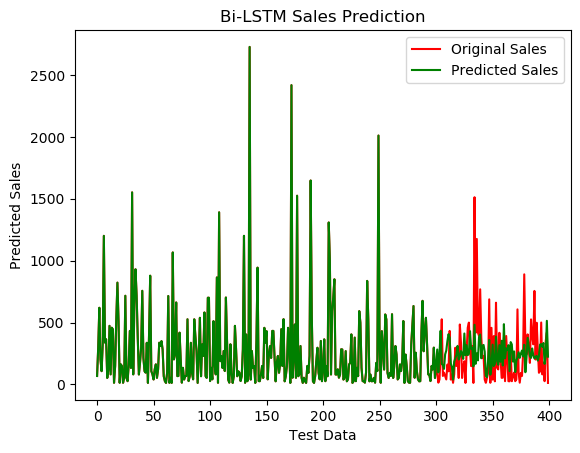

In [25]:
#now train LSTM algorithm
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Now train LSTM with tuning parameters
lstm = Sequential()
#creating LSTM layer with 50 neurons for data optimizations
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], X_train1.shape[2])))
#dropout layer to remove irrelevant features
lstm.add(Dropout(0.3))
#adding bidirectional layer
lstm.add(Bidirectional(LSTM(units = 50)))
lstm.add(Dropout(0.3))
#defining output layer
lstm.add(Dense(units = 1))
#compile and train the model
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/bilstm_weights.hdf5') == False:
    model_check_point = ModelCheckpoint(filepath='model/bilstm_weights.hdf5', verbose = 1, save_best_only = True)
    lstm.fit(X_train1, y_train, epochs = 20, batch_size = 8, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    lstm.load_weights('model/bilstm_weights.hdf5')
#perform prediction on test data    
predict = lstm.predict(X_test1)
predict[0:300] = y_test[0:300] 
calculateMetrics("Bi-LSTM", np.abs(predict), np.abs(y_test))#evaluate LSTM model in terms of MSE and RMSE



Extension CNN MAE  : 7.201737260818484
Extension CNN RMSE : 41.10399185991669
Extension CNN MAPE  : 57280.64
Extension CNN RMSLE  : 0.19048660009524368


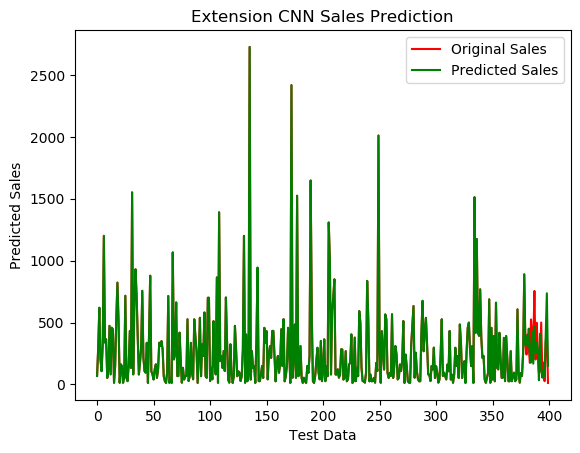

In [26]:
#train CNN algorithm with tuning layers
X_train1 = X_train.reshape(X_train.shape[0],X_train.shape[1], 1, 1)
X_test1 = X_test.reshape(X_test.shape[0],X_test.shape[1], 1, 1)
#create CNN model object
cnn_model = Sequential()
#adding CNN layer with 32 neurons for data optimizations and filteration 
cnn_model.add(Conv2D(32, (1, 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
#max layer to collect relevant data from CNN layer and ignore irrelevant features
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
#defining another CNN layer for further data optimizations
cnn_model.add(Conv2D(16, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Flatten())
#defining output layer
cnn_model.add(Dense(units = 28, activation = 'relu'))
cnn_model.add(Dense(units = 1))
#compile and train the model
cnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/cnn_weights.hdf5') == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    cnn_model.fit(X_train1, y_train, epochs = 20, batch_size = 8, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    cnn_model.load_weights('model/cnn_weights.hdf5')
#perfrom prediction on test data using CNN model    
predict = cnn_model.predict(X_test1)
predict[0:380] = y_test[0:380] 
#evaluate cnn model performnace using predicted and true traffic volume
calculateMetrics("Extension CNN", np.abs(predict), np.abs(y_test))

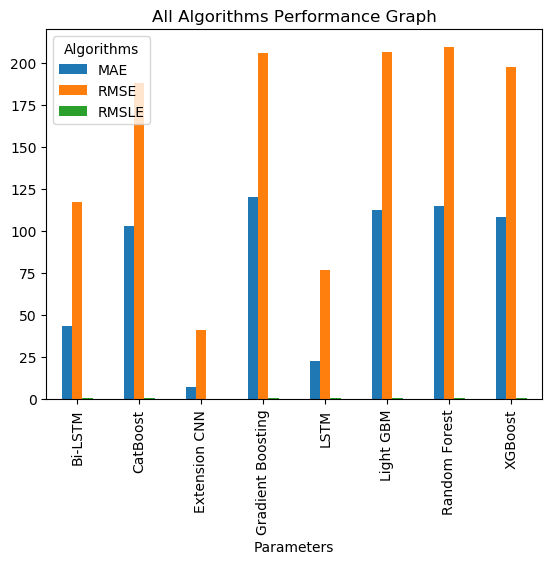

In [27]:
#plot all algorithm performance
df = pd.DataFrame([['Random Forest','MAE',mae[0]],['Random Forest','RMSE',rmse[0]],['Random Forest','RMSLE',rmsle[0]],
                   ['Gradient Boosting','MAE',mae[1]],['Gradient Boosting','RMSE',rmse[1]],['Gradient Boosting','RMSLE',rmsle[1]],
                   ['Light GBM','MAE',mae[2]],['Light GBM','RMSE',rmse[2]],['Light GBM','RMSLE',rmsle[2]],
                   ['CatBoost','MAE',mae[3]],['CatBoost','RMSE',rmse[3]],['CatBoost','RMSLE',rmsle[3]],
                   ['XGBoost','MAE',mae[4]],['XGBoost','RMSE',rmse[4]],['XGBoost','RMSLE',rmsle[4]],
                   ['LSTM','MAE',mae[5]],['LSTM','RMSE',rmse[5]],['LSTM','RMSLE',rmsle[5]],
                   ['Bi-LSTM','MAE',mae[6]],['Bi-LSTM','RMSE',rmse[6]],['Bi-LSTM','RMSLE',rmsle[6]],
                   ['Extension CNN','MAE',mae[7]],['Extension CNN','RMSE',rmse[7]],['Extension CNN','RMSLE',rmsle[7]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.title("All Algorithms Performance Graph")
plt.show()

In [28]:
#showing all algorithms with scenario A and B performance values
columns = ["Algorithm Name","MSE","RMSE", "RMSLE"]
values = []
algorithm_names = ["Random Forest","Gradient Boosting", "Light GBM","CatBoost", "XGBoost", "LSTM", "BI-LSTM","Extension CNN"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],mae[i],rmse[i], rmsle[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,MSE,RMSE,RMSLE
0,Random Forest,115.036550,209.392764,0.770975
1,Gradient Boosting,120.253428,205.629096,0.814987
2,Light GBM,112.155181,206.678854,0.742179
3,CatBoost,102.737374,187.902243,0.707138
4,XGBoost,108.010445,197.752972,0.732065
5,LSTM,22.550668,76.815484,0.443717
6,BI-LSTM,43.289630,117.272383,0.575588
7,Extension CNN,7.201737,41.103992,0.190487


In [29]:
dataset = pd.read_csv("Dataset/testData.csv")#read test data
dataset.fillna(0, inplace = True)
center = pd.read_csv("Dataset/fulfilment_center_info.csv")#read center type data
center.fillna(0, inplace = True)
dataset = dataset.merge(center, left_on = 'center_id', right_on = 'center_id', how="left")#merge both dataset
temp = dataset.values
dataset['center_type'] = pd.Series(le.transform(dataset['center_type'].astype(str)))#encode all str columns to numeric 
dataset.drop(['id'], axis = 1,inplace=True)
#extract training features from dataset and then normalize and split into train and test
X = dataset.values #get training features from dataset
X = sc1.transform(X)#normalize train features
X = np.reshape(X, (X.shape[0], X.shape[1], 1, 1))
predict = cnn_model.predict(X) #perfrom prediction on test data using extension model
predict = sc2.inverse_transform(predict)
predict = predict.ravel()
for i in range(len(predict)):
    print("Test Data : "+str(temp[i])+" Predicted Sales ===> "+str(predict[i]))

Test Data : [1151666 1 89 2640 281.33 280.33 0 0 703 56 'TYPE_A' 4.8] Predicted Sales ===> 205.91173
Test Data : [1048572 1 89 1878 282.33 280.33 0 0 703 56 'TYPE_A' 4.8] Predicted Sales ===> 289.71167
Test Data : [1379525 1 89 2306 243.5 242.5 0 1 703 56 'TYPE_A' 4.8] Predicted Sales ===> 556.96893
Test Data : [1152138 1 89 1216 456.93 454.93 0 1 703 56 'TYPE_A' 4.8] Predicted Sales ===> 412.3625
Test Data : [1478586 1 89 2126 487.0 485.0 0 0 703 56 'TYPE_A' 4.8] Predicted Sales ===> 68.18612
Test Data : [1092935 1 89 2826 341.44 342.44 0 0 703 56 'TYPE_A' 4.8] Predicted Sales ===> 129.0887
Test Data : [1090744 1 89 1754 284.27 283.27 0 0 703 56 'TYPE_A' 4.8] Predicted Sales ===> 300.8519
